<a href="https://colab.research.google.com/github/JeongHwa1217/inferDtypes/blob/main/featureConfiguration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# library
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt


In [3]:
# upload data
from google.colab import files
uploaded = files.upload()

Saving games.csv to games.csv


In [9]:
# read data
df = pd.read_csv(io.BytesIO(uploaded['games.csv']))
data = df

In [1]:
def infer_dtypes(df):
    col_name = df.columns
    origin_dt = df.dtypes
    inferred_dt = []
    col_unique = []
    col_notNull = []
    col_pct = []
    col_label = []

    for col in col_name:
        unique_value = df[col].unique()
        unique_cnt = len(unique_value)
        notNull_cnt = df[col].notnull().sum()
        col_notNull.append(notNull_cnt)
        unique_pct = unique_cnt / notNull_cnt
        col_pct.append(unique_pct)

        if (unique_cnt == 2):
            dataType = 'binary'

        elif (origin_dt[col] == 'int64'):
            if (unique_cnt < 5 or unique_pct < 0.005):
                dataType = 'category'
            else:
                dataType = 'numerical'

        elif (origin_dt[col] == 'float64'):
            if (unique_cnt < 5 or unique_pct < 0.005):
                dataType = 'category'
            else:
                dataType = 'numerical'

        elif (origin_dt[col] == 'object'):
            if (unique_cnt < 10 or unique_pct < 0.1):
                dataType = 'category'
            else:
                dataType = 'text'

        # DON'T KNOW
        else:
            dataType = 'text'


        # Input / Output / except
        if (unique_pct == 1 or notNull_cnt/df.shape[0] < 0.7):
            col_label.append('except')

        # if column name contains 'label'
        elif ('label' in col.lower()):
            col_label.append('output')

        else:
            col_label.append('input')

        col_unique.append(unique_cnt)
        inferred_dt.append(dataType)

    result = pd.DataFrame(data={'origin': origin_dt, 'rule base': inferred_dt,
                                'unique': col_unique, 'total': col_notNull, 'pct': col_pct,
                                'label': col_label})

    # def convertType(inferType):
    #   if(inferType == "integer")

    #print(result)
    return result


In [29]:

def draw_graph(df, result):
    row_names = result.index.values

    for row_name in row_names:
        row = result.loc[row_name]
        dtype = row['rule base']

        if (dtype is 'text'):
            print(row_name, ': ')
            print('unique / total = ', row['unique'],' / ', row['total'], '\t= ', format(row['pct'], ".2%"))

        elif (dtype is 'numerical'):
            # print(row_name)
            plt.hist(df[row_name])
            plt.title(row_name)
            plt.show()

        elif (dtype is 'binary'):
            labels = df[row_name].unique()
            plt.pie(df[row_name].value_counts(), labels=labels, explode=[0, 0.1], startangle=90, autopct='%1.1f%%')
            plt.title(row_name)
            plt.show()

        elif (dtype is 'category'):
            print(row_name, ': ')
            value_pct = df[row_name].value_counts(normalize=True, sort=True, ascending=False).head(2)
            value_pct.loc['others'] = 1 - sum(value_pct)
            [print(value_pct.index[i],'\t',format(value_pct.iloc[i], ".2%")) for i in range(3)]

        print()


                 origin  rule base  unique  total       pct  label
id               object       text   19113  20058  0.952887  input
rated              bool     binary       2  20058  0.000100  input
created_at      float64  numerical   13151  20058  0.655649  input
last_move_at    float64  numerical   13186  20058  0.657394  input
turns             int64  numerical     211  20058  0.010519  input
victory_status   object   category       4  20058  0.000199  input
winner           object   category       3  20058  0.000150  input
increment_code   object   category     400  20058  0.019942  input
white_id         object       text    9438  20058  0.470535  input
white_rating      int64  numerical    1516  20058  0.075581  input
black_id         object       text    9331  20058  0.465201  input
black_rating      int64  numerical    1521  20058  0.075830  input
moves            object       text   18920  20058  0.943265  input
opening_eco      object   category     365  20058  0.018197  i

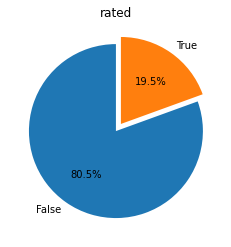

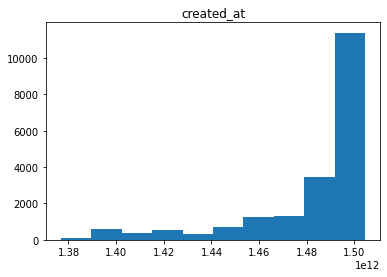

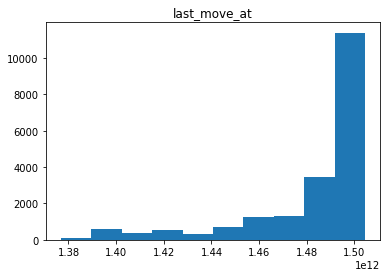

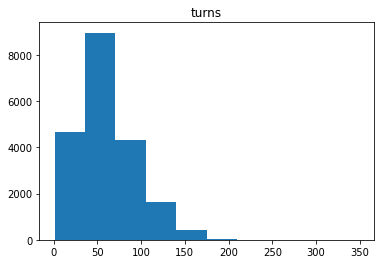


victory_status : 
resign 	 55.57%
mate 	 31.53%
others 	 12.89%

winner : 
white 	 49.86%
black 	 45.40%
others 	 4.74%

increment_code : 
10+0 	 38.49%
15+0 	 6.54%
others 	 54.97%

white_id : 
unique / total =  9438  /  20058 	=  47.05%



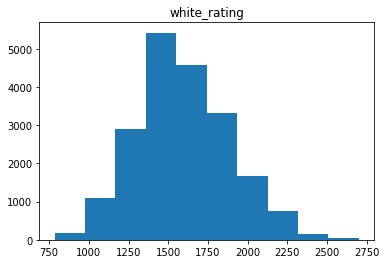


black_id : 
unique / total =  9331  /  20058 	=  46.52%



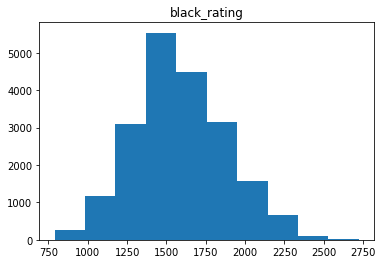


moves : 
unique / total =  18920  /  20058 	=  94.33%

opening_eco : 
A00 	 5.02%
C00 	 4.21%
others 	 90.77%

opening_name : 
Van't Kruijs Opening 	 1.83%
Sicilian Defense 	 1.78%
others 	 96.38%

opening_ply : 
3 	 17.40%
4 	 16.49%
others 	 66.11%



In [32]:
result = infer_dtypes(df)
print(result)
print('\n')
draw_graph(df, result)